# 🧠 GPT-2 Text Generation Project

This project explores how GPT-2, a decoder-only transformer model, generates coherent text using autoregressive generation. It is part of my LLM foundational learning roadmap.

---

### ✅ Project Goals:
- Understand how GPT-2 works as an autoregressive decoder
- Learn decoding strategies: greedy, sampling, top-k, top-p
- Control generation using temperature
- Generate creative text from prompts
- Optionally fine-tune GPT-2 on custom data


In [1]:
# Install required libraries
!pip install transformers
!pip install torch
!pip install sentencepiece  # For tokenizer compatibility (some GPT-2 variants)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

## 🔌 Load GPT-2 Model and Tokenizer

We load the pretrained GPT-2 model (`gpt2`) and its tokenizer using Hugging Face's `transformers` library. This allows us to tokenize input text and generate outputs using GPT-2’s language modeling head.


In [2]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

model.eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

## ✏️ Tokenizing the Input Prompt

We use GPT-2’s tokenizer to convert a text prompt into input tokens (IDs). These token IDs are what the model understands and uses for generating text.


In [3]:
prompt_text = "The future of artificial intelligence is"
input_ids = tokenizer.encode(prompt_text, return_tensors="pt")
print("Input Token IDs:", input_ids)
print("Decoded Text:", tokenizer.decode(input_ids[0]))


Input Token IDs: tensor([[  464,  2003,   286, 11666,  4430,   318]])
Decoded Text: The future of artificial intelligence is


## 🚀 Step 6: Text Generation with Greedy Decoding

Now that we've tokenized the input, we use GPT-2 to generate text. Greedy decoding selects the most likely next token at each step, making the generation fast and deterministic. However, it may lack creativity and diversity.


In [6]:
greedy_output = model.generate(
    input_ids,
    max_length = 50,
    do_sample = False,
    pad_token_id=tokenizer.eos_token_id
)

output_text = tokenizer.decode(greedy_output[0], skip_special_tokens=True)

print("generated text (Greedy):")
print(output_text)

generated text (Greedy):
The future of artificial intelligence is uncertain.

"We're not sure what the future will look like," said Dr. Michael S. Schoenfeld, a professor of computer science at the University of California, Berkeley. "But we're not


## 🔥 Step 7: Sampling-Based Decoding with Temperature

Greedy decoding always chooses the most probable next token, which often leads to repetitive or dull outputs. In contrast, sampling introduces controlled randomness. The `temperature` parameter adjusts how "risky" or creative the model can be:
- `temperature = 1.0` → baseline randomness
- `< 1.0` → more conservative (safer)
- `> 1.0` → more creative or wild

Sampling helps generate diverse and more human-like completions.


In [10]:
sample_output = model.generate(
    input_ids,
    max_length = 50,
    do_sample = True,
    temperature = 0.9,
    top_k = 0,
    pad_token_id=tokenizer.eos_token_id
)

sampled_text = tokenizer.decode(sample_output[0], skip_special_tokens=True)

print("🔹 Generated Text (Sampling, Temperature=0.9):")
print(sampled_text)

🔹 Generated Text (Sampling, Temperature=0.9):
The future of artificial intelligence is extremely bright Saunders writes of his experience that it's "a new kind of list, and in no time, they will be able to gather themselves and integrate it up".

The might of that class of AI that


🔄 Summary of Sampling Temperatures:

Temperature	Output Style

0.7	Safe, controlled creativity

0.9	Balanced, human-like

1.2+	Bold, poetic, or chaotic

## 🎯 Step 8: Top-k Sampling

Top-k sampling limits the model’s randomness by selecting from only the top `k` most probable next tokens. Instead of considering the full vocabulary, GPT-2 samples from the best `k` choices. This prevents low-quality or strange outputs while still allowing for diversity and creativity.

- `k=50` is a good balance between creativity and control.
- Smaller `k` means safer, more focused text.


In [11]:
# 🎯 Generate text using Top-k sampling
topk_output = model.generate(
    input_ids,
    max_length=50,
    do_sample=True,           # Enable sampling
    top_k=50,                 # Only consider top 50 tokens
    temperature=0.9,          # Control creativity
    pad_token_id=tokenizer.eos_token_id
)

# Decode and print
topk_text = tokenizer.decode(topk_output[0], skip_special_tokens=True)

print("🔹 Generated Text (Top-k Sampling, k=50):")
print(topk_text)


🔹 Generated Text (Top-k Sampling, k=50):
The future of artificial intelligence is also on the rise.

But even before we can get there, it is needed to start thinking critically about the ways in which this is not just one of the most important and rapidly growing industries. For more than


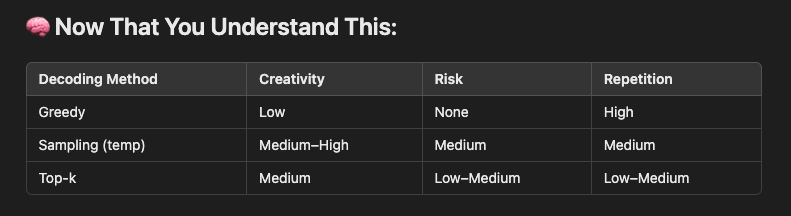

## 🧠 Step 9: Top-p (Nucleus) Sampling

Top-p sampling, also called nucleus sampling, selects the smallest set of tokens whose **cumulative probability ≥ p** (e.g., 90%). This dynamic filtering allows the model to sample only from the most meaningful tokens, regardless of how many that is.

- Unlike Top-k (fixed number), Top-p adapts per step.
- Combines creativity and contextual relevance better than basic sampling.


In [12]:
# 🧠 Generate text using Top-p (nucleus) sampling
topp_output = model.generate(
    input_ids,
    max_length=50,
    do_sample=True,
    top_p=0.9,                 # Cumulative probability threshold
    temperature=0.9,           # Optional: still controls creativity
    pad_token_id=tokenizer.eos_token_id
)

# Decode and print
topp_text = tokenizer.decode(topp_output[0], skip_special_tokens=True)

print("🔹 Generated Text (Top-p Sampling, p=0.9):")
print(topp_text)


🔹 Generated Text (Top-p Sampling, p=0.9):
The future of artificial intelligence is on the verge of exploding."

In the meantime, some AI researchers are already working on ways to detect and fix problems that can't be solved by machine learning. In 2012, researchers at the University of Nottingham in


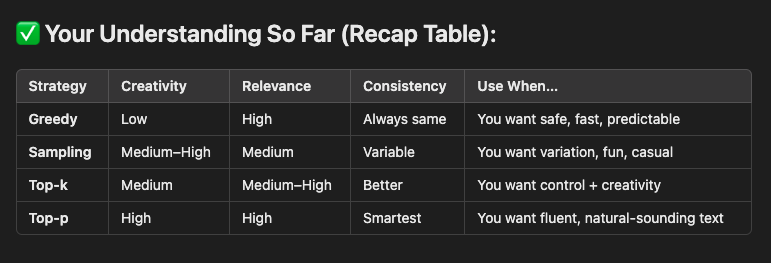

## 🧾 Step 10: Comparing All Decoding Strategies

Let’s compare the outputs from all four decoding strategies: Greedy, Sampling, Top-k, and Top-p. Each method controls how the next token is selected, balancing between consistency, creativity, and coherence.

| Strategy     | Output Summary | Strengths | Weaknesses |
|--------------|----------------|-----------|------------|
| Greedy       | Always picks the top token → tends to repeat or feel dull | Fast, reproducible | Can get stuck, lacks creativity |
| Sampling     | Randomly picks next token based on probability | Adds variety and realism | Can lose coherence at high temperature |
| Top-k        | Samples from top 50 probable tokens | Good balance of logic + creativity | Fixed k may miss rare but relevant tokens |
| Top-p        | Samples from dynamic set covering 90% probability | Most natural and human-like | Slightly slower, but smarter |


In [13]:
print("🔹 Greedy Decoding:\n", output_text)
print("\n🔹 Sampling (temp=0.9):\n", sampled_text)
print("\n🔹 Top-k Sampling (k=50):\n", topk_text)
print("\n🔹 Top-p Sampling (p=0.9):\n", topp_text)


🔹 Greedy Decoding:
 The future of artificial intelligence is uncertain.

"We're not sure what the future will look like," said Dr. Michael S. Schoenfeld, a professor of computer science at the University of California, Berkeley. "But we're not

🔹 Sampling (temp=0.9):
 The future of artificial intelligence is extremely bright Saunders writes of his experience that it's "a new kind of list, and in no time, they will be able to gather themselves and integrate it up".

The might of that class of AI that

🔹 Top-k Sampling (k=50):
 The future of artificial intelligence is also on the rise.

But even before we can get there, it is needed to start thinking critically about the ways in which this is not just one of the most important and rapidly growing industries. For more than

🔹 Top-p Sampling (p=0.9):
 The future of artificial intelligence is on the verge of exploding."

In the meantime, some AI researchers are already working on ways to detect and fix problems that can't be solved by machi

# ✏️ Section 2: Prompt Engineering & Output Control

In this section, we explore how GPT-2 responds to different styles of prompts and how output can be controlled using `max_length`, `min_length`, and formatting. This helps us understand GPT-2’s behavior across question-answering, story generation, summaries, and dialogue formats.


## 🧪 Step 1: Experiment with Prompt Styles

GPT-2 is highly sensitive to the prompt style. A small change in phrasing can significantly shift the tone, structure, and focus of the generated text. In this step, we try different types of prompts:
- Instructional
- Storytelling
- Dialogue
- Question/Answer

We'll generate text for each and observe how GPT-2 adapts.


In [15]:
# Define a reusable generation function
def generate_response(prompt, max_length=60):
    input_ids = tokenizer.encode(prompt, return_tensors="pt")
    output_ids = model.generate(
        input_ids,
        max_length=max_length,
        do_sample=True,
        top_p=0.9,
        temperature=0.9,
        pad_token_id=tokenizer.eos_token_id
    )
    return tokenizer.decode(output_ids[0], skip_special_tokens=True)


In [16]:
instructional_prompt = "Write a short paragraph about the importance of sleep."
instructional_output = generate_response(instructional_prompt)
print("🧠 Instructional Output:\n", instructional_output)


🧠 Instructional Output:
 Write a short paragraph about the importance of sleep.

A person is in a position to experience the full spectrum of feelings and experiences. They can learn to tolerate and express them as if they were the source of the feelings, sensations and experiences that are contained within.

They can learn to


In [19]:
story_prompt = "Once upon a time in a world ruled by machines,"
story_output = generate_response(story_prompt)
print("📖 Storytelling Output:\n", story_output)


📖 Storytelling Output:
 Once upon a time in a world ruled by machines, there was a man who was a genius. His name was James Bond. He was the creator of the atomic bomb. He invented the world's first nuclear weapon. He invented the universe's first black hole. He invented the sun's motion.


In [18]:
dialogue_prompt = "Human: What do you think about climate change?\nAI:"
dialogue_output = generate_response(dialogue_prompt)
print("💬 Dialogue Output:\n", dialogue_output)


💬 Dialogue Output:
 Human: What do you think about climate change?
AI: I think we need to be thinking about all things, not just science. Science has always been about the fundamental question, "What do we know about climate change?" Now, I think there's a lot of data to be made about


In [17]:
qa_prompt = "Q: What is the capital of Japan?\nA:"
qa_output = generate_response(qa_prompt)
print("❓ Q&A Output:\n", qa_output)


❓ Q&A Output:
 Q: What is the capital of Japan?
A: The capital of Japan is Nippon Professional Baseball. It was founded in 1929 as the first professional baseball franchise in the world. Since its inception, Nippon Professional Baseball has won 23 World Series and the World Championship and won 11 World


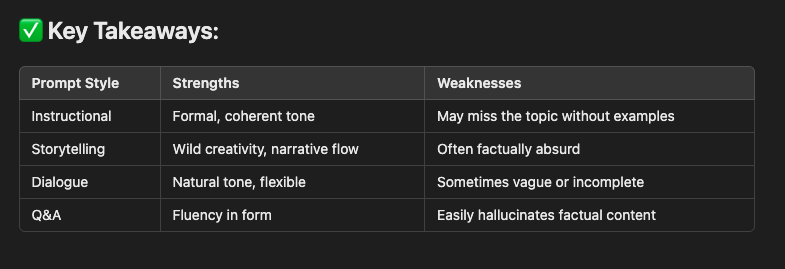

## ✅ Observations from Prompt Styles

GPT-2’s responses vary significantly based on prompt phrasing. While storytelling and dialogue formats work well stylistically, factual accuracy (especially in Q&A) is unreliable. This emphasizes the importance of choosing prompts carefully depending on your use case.


## 📏 Step 2: Controlling Output Length

By default, GPT-2 continues generating until the max length is reached or it hits an EOS (end-of-sequence) token. To control this behavior, we use:
- `max_length`: Total length of input + output tokens
- `min_length`: Forces GPT-2 to continue at least this many tokens

This helps us prevent early stopping or excessive generation.


In [20]:
prompt = "Explain the role of machine learning in healthcare."

# Generate with length control
length_control_output = model.generate(
    tokenizer.encode(prompt, return_tensors="pt"),
    do_sample=True,
    top_p=0.9,
    temperature=0.9,
    min_length=60,          # Force at least 60 tokens
    max_length=80,          # Stop at 80 tokens
    pad_token_id=tokenizer.eos_token_id
)

# Decode and print
print(tokenizer.decode(length_control_output[0], skip_special_tokens=True))


Explain the role of machine learning in healthcare.

In order to build our next platform, we need to understand what it takes to make sure that machine learning is fully integrated into the healthcare system. This includes training our developers to be experts on machine learning, and to be able to make improvements in their code.

As you will see, this is an important step in learning about machine


## ✅ Observations on Output Length Control

Using `min_length` ensures the model doesn't stop too early, while `max_length` prevents overly long or rambling outputs. For most paragraph-sized outputs, a range of 60–100 tokens works well. Always experiment with both values when tuning output quality and completeness.
